In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from prophet import Prophet
import matplotlib.pyplot as plt
from itertools import product

In [2]:
# Load the dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('WIPRO 2024.csv')

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date']).dt.date
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})

In [3]:
data.head()

,ds,Open,High,Low,y,Volume
0,2015-01-01,207.21,207.90,206.44,207.15,202978
1,2015-01-02,207.53,210.09,207.38,208.99,787304
2,2015-01-05,208.89,211.88,208.31,209.36,719738
3,2015-01-06,208.13,208.65,203.29,204.47,2324381
4,2015-01-07,203.70,204.38,201.88,202.91,1557297


In [4]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.80)
train_data = data[:train_size]
test_data = data[train_size:]

In [5]:
# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1,interval_width=0.95)
model.fit(train_data)

# Make predictions on the test data
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

10:27:15 - cmdstanpy - INFO - Chain [1] start processing
10:27:15 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Extract the predicted values for the test set
predicted_test = forecast[-len(test_data):]['yhat'].values
actual_test = test_data['y'].values

# Calculate RMSE for the test data
rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))
print(f"RMSE on Test Data: {rmse}")

RMSE on Test Data: 128.2870123349998


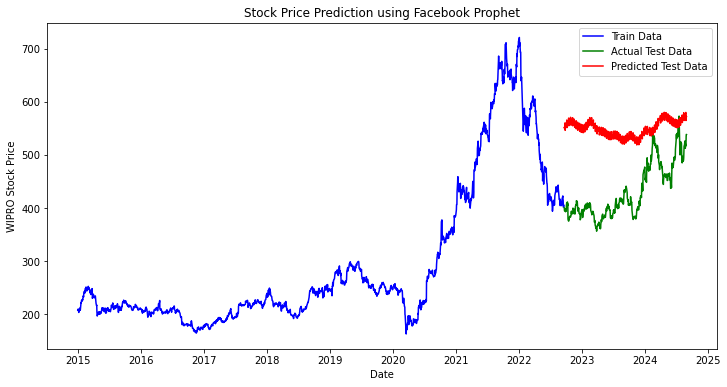

In [7]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Data', color='blue')
plt.plot(test_data['ds'], actual_test, label='Actual Test Data', color='green')
plt.plot(test_data['ds'], predicted_test, label='Predicted Test Data', color='red')
plt.xlabel('Date')
plt.ylabel('WIPRO Stock Price')
plt.title('Stock Price Prediction using Facebook Prophet')
plt.legend()
plt.show()

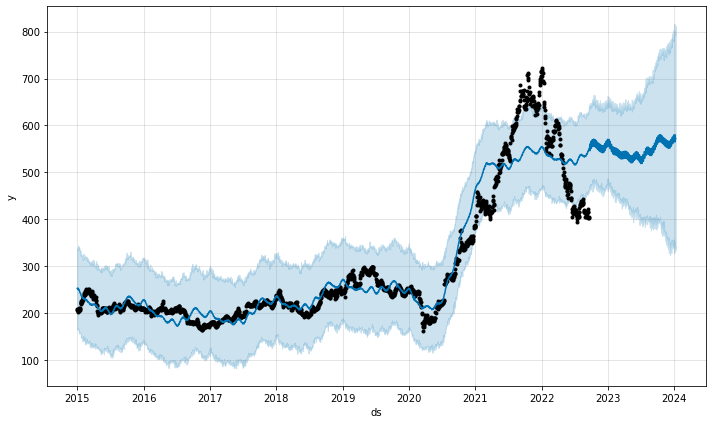

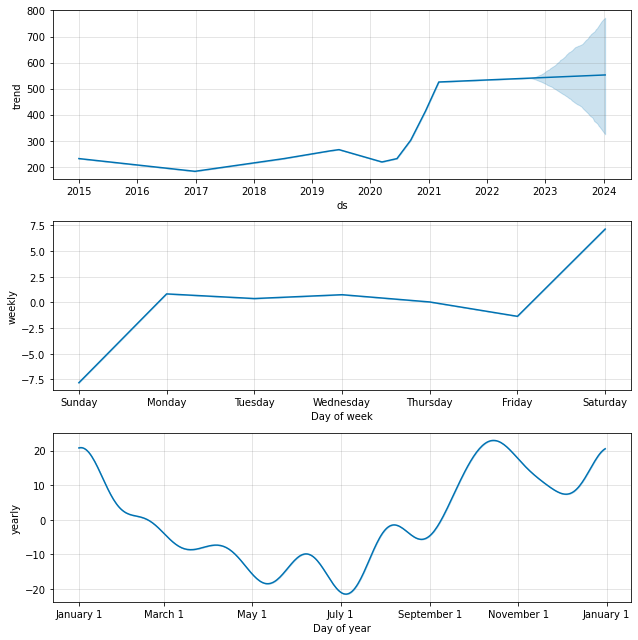

In [8]:
# Prophet's internal plot for visualization
model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()

In [9]:
# Define a function for hyperparameter optimization
def optimize_prophet(train_data, param_grid):
    best_params = None
    best_rmse = float('inf')

    for params in product(*param_grid.values()):
        param_dict = dict(zip(param_grid.keys(), params))
        model = Prophet(**param_dict)
        model.fit(train_data)

        future = model.make_future_dataframe(periods=len(test_data))
        forecast = model.predict(future)

        predicted_test = forecast[-len(test_data):]['yhat'].values
        actual_test = test_data['y'].values

        rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = param_dict

    return best_params, best_rmse

# Define the parameter grid for optimization
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 1.0, 10.0]
}

# Optimize the hyperparameters
best_params, best_rmse = optimize_prophet(train_data, param_grid)
print(f"Best Parameters: {best_params}")
print(f"Best RMSE on Validation Data: {best_rmse}")

# Train the model with the best parameters
model = Prophet(**best_params)
model.fit(train_data)

# Make predictions on the test data
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

# Extract the predicted values for the test set
predicted_test = forecast[-len(test_data):]['yhat'].values
actual_test = test_data['y'].values

# Calculate RMSE for the test data
rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))
print(f"Final RMSE on Test Data: {rmse}")

10:27:20 - cmdstanpy - INFO - Chain [1] start processing
10:27:20 - cmdstanpy - INFO - Chain [1] done processing
10:27:21 - cmdstanpy - INFO - Chain [1] start processing
10:27:21 - cmdstanpy - INFO - Chain [1] done processing
10:27:22 - cmdstanpy - INFO - Chain [1] start processing
10:27:23 - cmdstanpy - INFO - Chain [1] done processing
10:27:24 - cmdstanpy - INFO - Chain [1] start processing
10:27:24 - cmdstanpy - INFO - Chain [1] done processing
10:27:26 - cmdstanpy - INFO - Chain [1] start processing
10:27:26 - cmdstanpy - INFO - Chain [1] done processing
10:27:27 - cmdstanpy - INFO - Chain [1] start processing
10:27:28 - cmdstanpy - INFO - Chain [1] done processing
10:27:29 - cmdstanpy - INFO - Chain [1] start processing
10:27:30 - cmdstanpy - INFO - Chain [1] done processing
10:27:31 - cmdstanpy - INFO - Chain [1] start processing
10:27:33 - cmdstanpy - INFO - Chain [1] done processing
10:27:34 - cmdstanpy - INFO - Chain [1] start processing
10:27:36 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.1}
Best RMSE on Validation Data: 103.8087923885397


10:28:13 - cmdstanpy - INFO - Chain [1] start processing
10:28:14 - cmdstanpy - INFO - Chain [1] done processing


Final RMSE on Test Data: 103.8087923885397
